In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
a = -1
b = 1
k = 20
points = 100

In [27]:
def f(alpha=1):
    return -1 / alpha


def q(x, alpha=1, beta=1):
    return 1 + x ** 2 * beta / alpha


def fi(i, x, alpha=1, beta=1):
    return x ** i * (1 - x ** 2)

In [15]:
def solve(A):
    X = np.linspace(-1, 1, points)
    Y = [sum(A[i] * fi(i, x) for i in range(points)) for x in X]
    plt.plot(X, Y)
    plt.show()
    print("Y = ", np.max(Y))

In [26]:
def N(i, x, alpha=1, beta=1):
    if i == 0:
        return - 2 + q(x, alpha, beta) * fi(i, x)
    if i == 1:
        return -6 * x + q(x, alpha, beta) * fi(i, x)
    else:
        return (i - 1) * i * x ** (i - 2) - (i + 1) * (i + 2) * x ** i + q(x, alpha, beta) * fi(i, x)

In [25]:
def rectangle_formula(f1, f2, i, j, alpha=1, beta=1):
    h = (b - a) / 100
    x = np.linspace(a, b, 100)
    S = h * sum(f1(i, x[k], alpha, beta) * f2(j, x[k], alpha, beta) for k in range(100))
    return S

In [33]:
def collocation(alpha=1, beta=1):
    matrix = np.zeros(points * points).reshape(points, points)
    x = np.linspace(-1, 1, points)
    for i in range(points):
        for j in range(points):
            matrix[i, j] = N(j, x[i], alpha, beta)
    X = [f(alpha) for i in range(points)]
    A = np.linalg.solve(matrix, X)
    solve(A)


def sustained_least_square_method(alpha=1, beta=1):
    matrix = np.zeros(points * points).reshape(points, points)
    for i in range(points):
        for j in range(points):
            matrix[i, j] = rectangle_formula(N, N, i, j, alpha, beta)
    h = (b - a) / 100
    x = np.linspace(a, b, 100)
    X = [h * sum(f(alpha) * N(i, x[k], alpha, beta) for k in range(100)) for i in range(points)]
    A = np.linalg.solve(matrix, X)
    solve(A)


def discrete_least_square_method(alpha=1, beta=1):
    matrix = np.zeros(points * points).reshape(points, points)
    x = np.linspace(a, b, 100)
    for i in range(points):
        for j in range(points):
            matrix[i, j] = sum(N(i, x[k], alpha, beta) * N(j, x[k], alpha, beta) for k in range(points))
    X = [sum(f(alpha) * N(j, x[k], alpha, beta) for k in range(points)) for j in range(points)]
    A = np.linalg.solve(matrix, X)
    solve(A)


def galerkins_method(alpha=1, beta=1):
    matrix = np.zeros(points * points).reshape(points, points)
    for i in range(points):
        for j in range(points):
            matrix[i, j] = rectangle_formula(fi, N, i, j, alpha, beta)
    h = (b - a) / 100
    x = np.linspace(a, b, 100)
    X = [h * sum(f(alpha) * fi(i, x[k]) for k in range(100)) for i in range(points)]
    A = np.linalg.solve(matrix, X)
    solve(A)

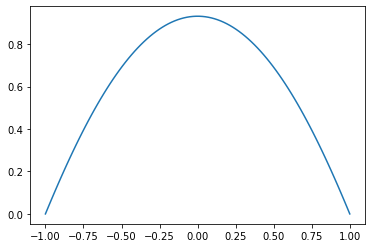

Y =  0.9319215021497015


In [38]:
galerkins_method()

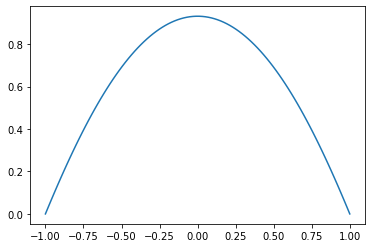

Y =  0.931955218197744


In [9]:
sustained_least_square_method()

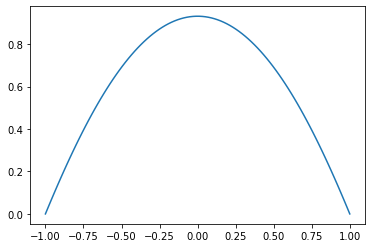

Y =  0.9319551651398291


In [10]:
discrete_least_square_method()

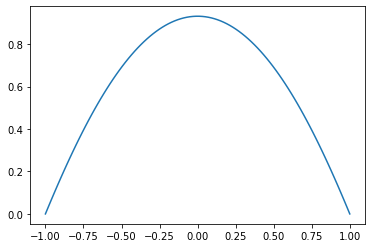

Y =  0.931955218197744


In [11]:
sustained_least_square_method()